In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data = pd.read_csv("resume_screen.csv")

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2000 non-null   object
 1   resume_text_256  2000 non-null   object
 2   jd_text_128      2000 non-null   object
 3   job_family       2000 non-null   object
 4   seniority        2000 non-null   object
 5   advance          2000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 93.9+ KB


In [85]:
data.head()

,id,resume_text_256,jd_text_128,job_family,seniority,advance
0,RS00000,"8+ years experience; key skills: linux, contai...",We are hiring a Senior DevOps professional. Mu...,DevOps,Senior,1
1,RS00001,"0+ years experience; key skills: kafka, ci/cd,...",We are hiring a Junior PM professional. Must h...,PM,Junior,0
2,RS00002,"0+ years experience; key skills: bug-tracking,...",We are hiring a Junior QA professional. Must h...,QA,Junior,1
3,RS00003,"2+ years experience; key skills: test-cases, b...",We are hiring a Mid QA professional. Must have...,QA,Mid,1
4,RS00004,"9+ years experience; key skills: testing, bug-...",We are hiring a Senior QA professional. Must h...,QA,Senior,1


In [86]:
data.describe()

,advance
count,2000.000000
mean,0.500000
std,0.500125
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [87]:
df = pd.DataFrame(data)

In [88]:
df.drop(columns=['id'], inplace=True)


In [89]:
print(df.isnull().sum())

resume_text_256    0
jd_text_128        0
job_family         0
seniority          0
advance            0
dtype: int64


In [90]:
print(data.shape)

(2000, 6)


In [91]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['resume_text_256'] = df['resume_text_256'].apply(clean_text)
df['jd_text_128'] = df['jd_text_128'].apply(clean_text)


In [92]:
df["resume_text_256"].head(5)

,resume_text_256
0,8 years experience key skills linux containers...
1,0 years experience key skills kafka cicd pytes...
2,0 years experience key skills bugtracking test...
3,2 years experience key skills testcases bugtra...
4,9 years experience key skills testing bugtrack...


In [93]:
df["jd_text_128"].head(5)

,jd_text_128
0,we are hiring a senior devops professional mus...
1,we are hiring a junior pm professional must ha...
2,we are hiring a junior qa professional must ha...
3,we are hiring a mid qa professional must have ...
4,we are hiring a senior qa professional must ha...


In [94]:
X_text = data[["resume_text_256", "jd_text_128"]]
X_cat = data[["job_family", "seniority"]]
y = data["advance"]

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

tfidf_resume = TfidfVectorizer(max_features=5000, stop_words='english')
X_resume_tfidf = tfidf_resume.fit_transform(X_text["resume_text_256"])

tfidf_jd = TfidfVectorizer(max_features=5000, stop_words='english')
X_jd_tfidf = tfidf_jd.fit_transform(X_text["jd_text_128"])

In [96]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
X_cat_enc = encoder.fit_transform(X_cat)

In [97]:
X = hstack([X_resume_tfidf, X_jd_tfidf, X_cat_enc])


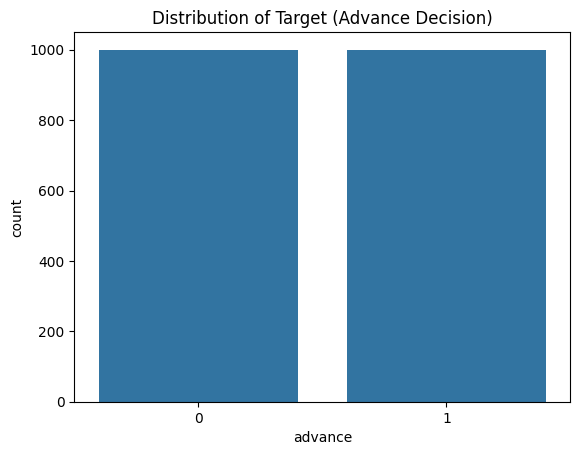

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='advance', data=data)
plt.title("Distribution of Target (Advance Decision)")
plt.show()


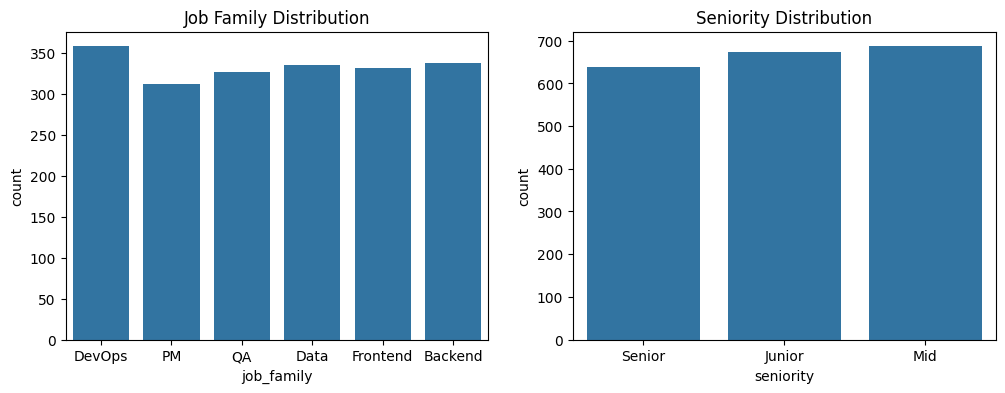

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='job_family', data=data, ax=axes[0])
axes[0].set_title("Job Family Distribution")

sns.countplot(x='seniority', data=data, ax=axes[1])
axes[1].set_title("Seniority Distribution")

plt.show()


In [100]:

data['resume_len'] = data['resume_text_256'].apply(lambda x: len(str(x).split()))
data['jd_len'] = data['jd_text_128'].apply(lambda x: len(str(x).split()))


outliers = data[(data['resume_len'] < 10) | (data['resume_len'] > 1000)]
print(outliers[['resume_len']])


Empty DataFrame
Columns: [resume_len]
Index: []


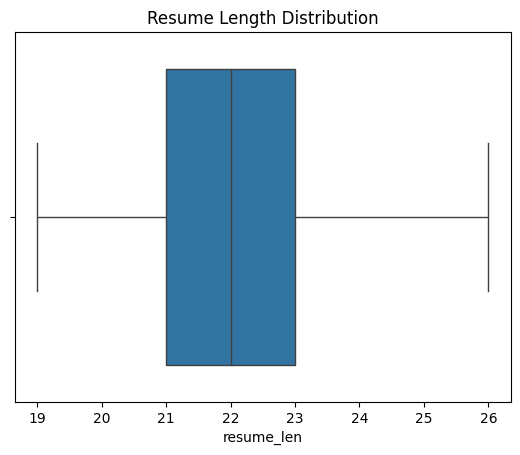

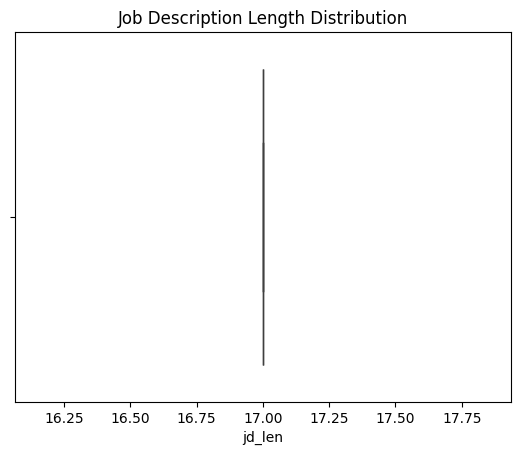

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['resume_len'])
plt.title("Resume Length Distribution")
plt.show()

sns.boxplot(x=data['jd_len'])
plt.title("Job Description Length Distribution")
plt.show()


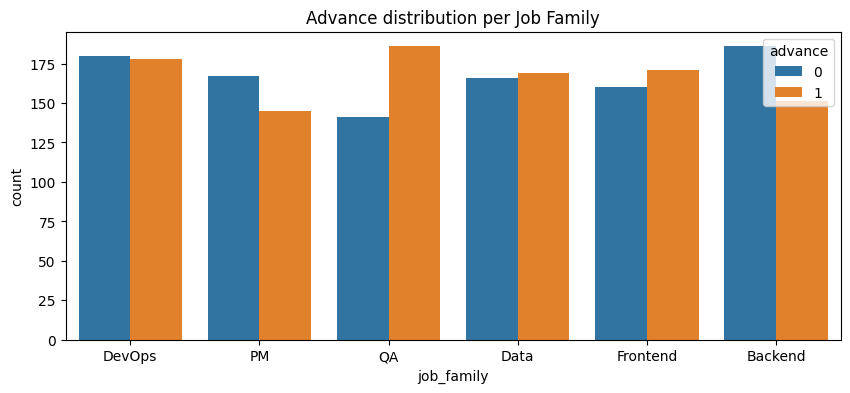

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.countplot(x='job_family', hue='advance', data=data)
plt.title("Advance distribution per Job Family")
plt.show()


In [103]:
!pip install tensorflow

In [104]:
!pip install keras

In [105]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()


In [106]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_dense.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         9,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
history = model.fit(
    X_train_dense, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.5051 - loss: 0.6976 - val_accuracy: 0.5219 - val_loss: 0.6909
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5294 - loss: 0.6898 - val_accuracy: 0.5844 - val_loss: 0.6833
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5974 - loss: 0.6754 - val_accuracy: 0.6156 - val_loss: 0.6779
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6394 - loss: 0.6618 - val_accuracy: 0.6344 - val_loss: 0.6634
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6376 - loss: 0.6553 - val_accuracy: 0.6469 - val_loss: 0.6445
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6716 - loss: 0.6253 - val_accuracy: 0.6812 - val_loss: 0.6124
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7071 - loss: 0.6003 - val_accuracy: 0.7312 - val_loss: 0.5838
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7094 - loss: 0.5695 - val_accuracy: 0.7406 - v

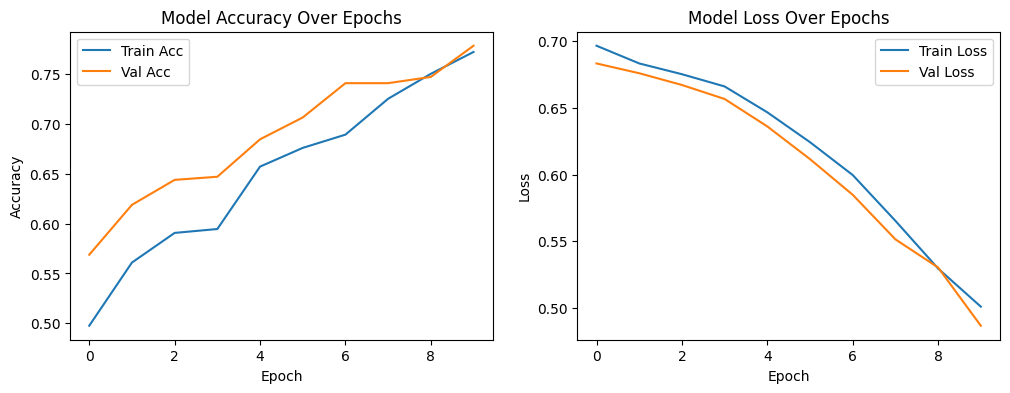

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [72]:
file_path ="/content/drive/MyDrive/Colab Notebooks/Untitled14.ipynb"

In [110]:
jd_example = """
Hiring a Senior Python Backend Engineer with 5+ years experience in Python,
REST APIs, Docker, and SQL. Experience designing scalable systems is required.
"""
resume_example = """
Senior Backend Engineer with 6 years of experience building REST APIs in Python and Flask.
Skilled in Docker, PostgreSQL, and system design.
"""

def clean_text(text):
    import re
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

jd_clean = clean_text(jd_example)
resume_clean = clean_text(resume_example)

resume_tfidf = tfidf_resume.transform([resume_clean])
jd_tfidf = tfidf_jd.transform([jd_clean])

cat_features = encoder.transform([["Engineering", "Senior"]])

from scipy.sparse import hstack
X_new = hstack([resume_tfidf, jd_tfidf, cat_features]).toarray()

# Prédiction


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [76]:

import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
